!jupyter kernelspec list

In [1]:
import conda
import json
import geopandas as gpd
import pandas as pd
%matplotlib inline

In [2]:
url1 = "../Datasets/telangana_shapefile.geojson" 
url2 = "../Datasets/gadm40_IND_3.shp"
tela = gpd.read_file(url1)
gadm_l3 = gpd.read_file(url2, bbox = tela)#mask = tela gadm_l3.NAME_1 == "Telangana"

In [3]:
telangana_adm3 = gpd.read_file(url2, mask = gadm_l3[gadm_l3.NAME_1 == "Telangana"])
telangana_adm3.NAME_3

0            Addatigala
1      Rampa Chodavaram
2              Guruzala
3          Sattenapalle
4          Jaggayyapeta
             ...       
106             Jangaon
107               Mulug
108        n.a. ( 1711)
109           Narsampet
110              Parkal
Name: NAME_3, Length: 111, dtype: object

<AxesSubplot:>

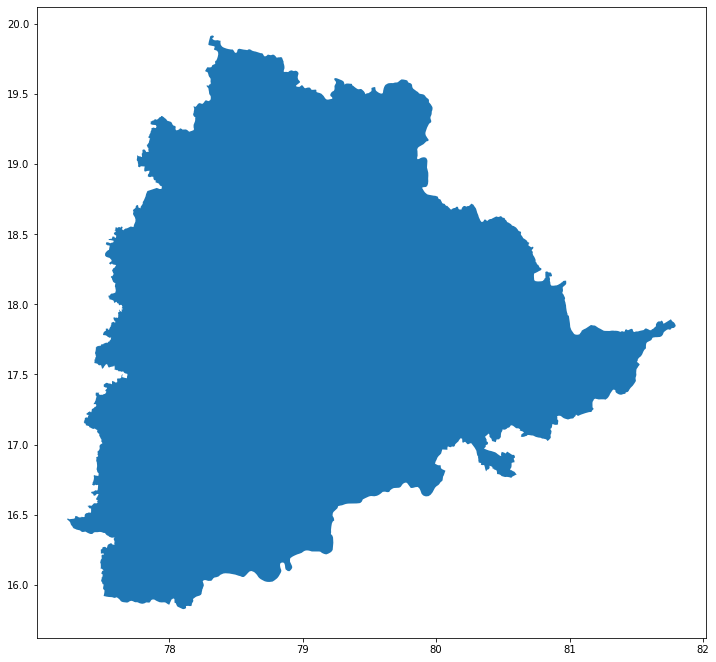

In [4]:
tela.plot(figsize=(12, 12))

<AxesSubplot:>

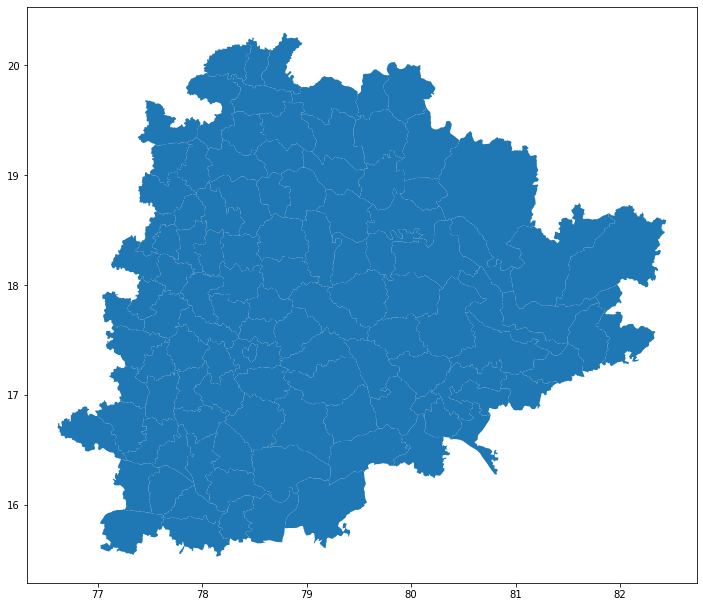

In [5]:
telangana_adm3.plot(figsize=(12, 12))

<AxesSubplot:>

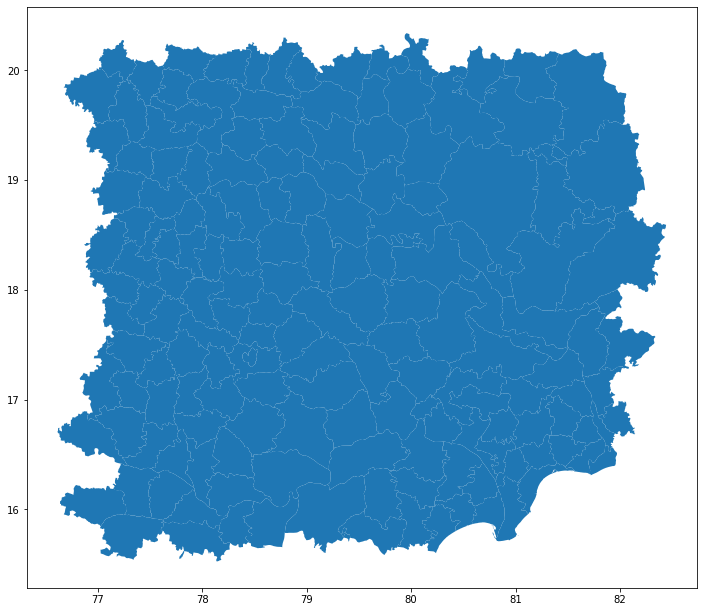

In [6]:
gadm_l3.plot(figsize=(12, 12))

In [7]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', sep=<no_default>, delimiter=None, header='infer', names=<no_default>, index_col=None, usecols=None, squeeze=None, prefix=<no_default>, mangle_dupe_cols=True, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=None, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression: 'CompressionOptions' = 'infer', thousands=None, decimal: 'str' = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, encoding_errors: 'str | None' = 'strict', dialect=None, error_bad_li

In [8]:
fire = "../Datasets/telangana_fires.csv"
fire_df = pd.read_csv(fire, parse_dates = ["acq_date"])
fire_df['acq_date'] = pd.to_datetime(fire_df['acq_date'],format='%Y%m%d')
fire_df['year'] = pd.DatetimeIndex(fire_df['acq_date']).year

In [9]:
fire_df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,year
0,18.3777,80.5314,318.6,1.0,1.0,2015-01-02,802,Aqua,MODIS,69,6.03,302.6,7.7,D,0,2015
1,17.5898,80.9893,315.4,1.2,1.1,2015-01-04,750,Aqua,MODIS,59,6.03,299.5,8.8,D,0,2015
2,17.6028,81.1612,311.8,1.2,1.1,2015-01-05,527,Terra,MODIS,46,6.03,299.8,6.0,D,0,2015
3,17.5241,80.3135,317.0,1.1,1.0,2015-01-05,527,Terra,MODIS,69,6.03,302.0,9.3,D,0,2015
4,17.7571,80.3404,317.2,2.5,1.5,2015-01-05,833,Aqua,MODIS,53,6.03,300.0,29.3,D,0,2015


In [10]:
fire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18785 entries, 0 to 18784
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   latitude    18785 non-null  float64       
 1   longitude   18785 non-null  float64       
 2   brightness  18785 non-null  float64       
 3   scan        18785 non-null  float64       
 4   track       18785 non-null  float64       
 5   acq_date    18785 non-null  datetime64[ns]
 6   acq_time    18785 non-null  int64         
 7   satellite   18785 non-null  object        
 8   instrument  18785 non-null  object        
 9   confidence  18785 non-null  int64         
 10  version     18785 non-null  float64       
 11  bright_t31  18785 non-null  float64       
 12  frp         18785 non-null  float64       
 13  daynight    18785 non-null  object        
 14  type        18785 non-null  int64         
 15  year        18785 non-null  int64         
dtypes: datetime64[ns](1), 

In [11]:
tela.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,IND,India,IND.32_1,Telangana,None,None,State,State,None,IN.TG,"MULTIPOLYGON (((79.21147 16.36281, 79.22324 16..."


In [12]:
gadm_l3.head()

,ID_0,COUNTRY,NAME_1,NL_NAME_1,NAME_2,NL_NAME_2,ID_3,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,geometry
0,IND,India,Andhra Pradesh,None,East Godavari,None,IND.2.3.1_1,Addatigala,Ellavaram,None,Taluk,Taluk,None,None,"POLYGON ((82.07857 17.27734, 82.06973 17.28242..."
1,IND,India,Andhra Pradesh,None,East Godavari,None,IND.2.3.4_1,Kottapeta,None,None,Taluk,Taluk,None,None,"POLYGON ((81.95258 16.69089, 81.93935 16.67283..."
2,IND,India,Andhra Pradesh,None,East Godavari,None,IND.2.3.9_1,Rajahmundry,None,None,Taluk,Taluk,None,None,"POLYGON ((81.82640 17.28865, 81.83046 17.27855..."
3,IND,India,Andhra Pradesh,None,East Godavari,None,IND.2.3.10_1,Ramachandrapuram,None,None,Taluk,Taluk,None,None,"POLYGON ((82.06456 16.68599, 82.05789 16.68310..."
4,IND,India,Andhra Pradesh,None,East Godavari,None,IND.2.3.11_1,Rampa Chodavaram,None,None,Taluk,Taluk,None,None,"POLYGON ((81.79440 17.84415, 81.80269 17.83785..."


In [13]:
tela.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
gadm_l3.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
fire_spatial = gpd.GeoDataFrame(fire_df, geometry = gpd.points_from_xy(fire_df["longitude"], fire_df["latitude"]), crs="EPSG:4326") # gpd.to_crs("EPSG:4326")
#gpd.crs = "EPSG:4326"

In [16]:
fire_spatial.to_file("../Datasets/fireIncident.geojson", driver="GeoJSON")

C:\Users\emeka\anaconda3\envs\gsdi\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


<AxesSubplot:>

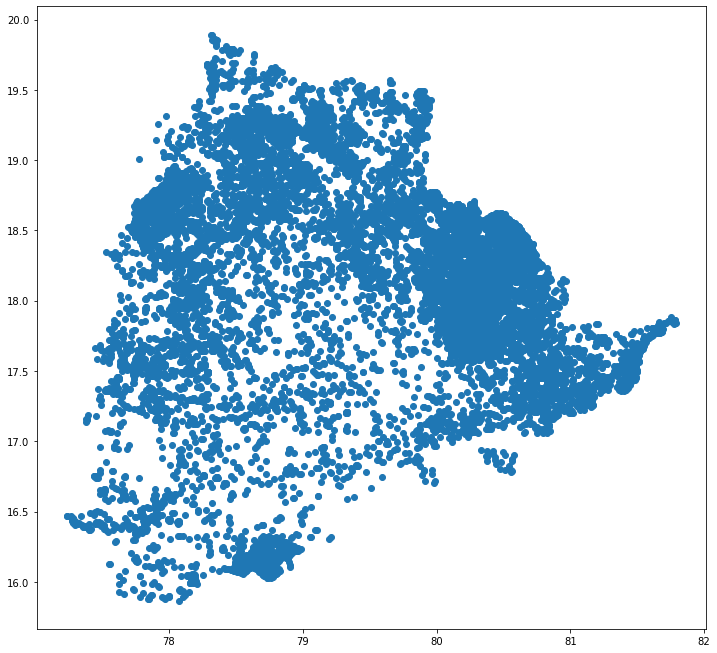

In [17]:
fire_spatial.plot(figsize = (12,12))

In [18]:
telangana_adm3n = gadm_l3[gadm_l3['NAME_1'] == "Telangana"]
telangana_adm3n = telangana_adm3[['NAME_1', 'NAME_2', 'ID_3', 'NAME_3', 'TYPE_3', 'ENGTYPE_3', 'geometry']]
telangana_adm3n = telangana_adm3.rename(columns={'NAME_1':'State', 'NAME_2':'Divisions', 'NAME_3':'adm_name'})

In [19]:
telangana_adm3n = telangana_adm3n.drop(['ID_0', 'COUNTRY', 'NL_NAME_1', 'NL_NAME_2', 'ID_3', 'VARNAME_3', 'NL_NAME_3', 'TYPE_3', 'ENGTYPE_3', 'CC_3', 'HASC_3'], axis=1)
fire_spatial = fire_spatial.drop(['latitude', 'longitude', 'brightness', 'scan', 'track', 'satellite', 'instrument', 'acq_date', 'acq_time', 'version', 'type', 'version', 'bright_t31', 'frp', 'daynight', 'confidence'], axis= 1)

In [20]:
fire_by_district = gpd.sjoin(fire_spatial, telangana_adm3n, how='left', predicate='within')
fire_by_district.head()

,year,geometry,index_right,State,Divisions,adm_name
0,2015,POINT (80.53140 18.37770),62,Telangana,Khammam,Venkatapuram
1,2015,POINT (80.98930 17.58980),58,Telangana,Khammam,Borgampad
2,2015,POINT (81.16120 17.60280),57,Telangana,Khammam,Bhadrachalam
3,2015,POINT (80.31350 17.52410),63,Telangana,Khammam,Yellandu
4,2015,POINT (80.34040 17.75710),63,Telangana,Khammam,Yellandu


In [21]:
fire_by_district.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 18785 entries, 0 to 18784
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   year         18785 non-null  int64   
 1   geometry     18785 non-null  geometry
 2   index_right  18785 non-null  int64   
 3   State        18785 non-null  object  
 4   Divisions    18785 non-null  object  
 5   adm_name     18785 non-null  object  
dtypes: geometry(1), int64(2), object(3)
memory usage: 1.0+ MB


In [22]:
fire_by_district = fire_by_district.drop(['index_right', 'State', 'geometry'], axis=1)

In [24]:
#fire_by_district[fire_by_district.year].count()
Task1 = fire_by_district.groupby(['year', 'adm_name']).count()
Task1

Divisions
year adm_name               
2015 Achampet            138
     Adilabad              2
     Alampur               6
     Armur                43
     Asifabad             15
...                      ...
2021 Yellandu            239
     Yellareddi           20
     Zahirabad            29
     n.a. ( 1711)         11
     n.a. ( 1728)          4

[496 rows x 1 columns]

In [26]:
Task1 = pd.DataFrame(Task1.rename(columns={'Divisions':'fireCounts'}))
Task1

fireCounts
year adm_name                
2015 Achampet             138
     Adilabad               2
     Alampur                6
     Armur                 43
     Asifabad              15
...                       ...
2021 Yellandu             239
     Yellareddi            20
     Zahirabad             29
     n.a. ( 1711)          11
     n.a. ( 1728)           4

[496 rows x 1 columns]

In [27]:
Task1.to_json('output1.json', orient = 'split')